In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import signal
from DasTools import DasPrep as dp

import glob
import os

import segyio

In [2]:
def get_shot_relative_id_from_file(fname):
    return int(os.path.splitext(os.path.basename(fname))[0].split('_')[-1])

In [3]:
das_npz_list = glob.glob('H:\\pingshan_das\\active_shots\\*')
das_npz_list.sort(key=lambda x: get_shot_relative_id_from_file(x))
das_npz_list

['H:\\pingshan_das\\active_shots\\Pingshan_active_shot_0.npz',
 'H:\\pingshan_das\\active_shots\\Pingshan_active_shot_1.npz',
 'H:\\pingshan_das\\active_shots\\Pingshan_active_shot_2.npz',
 'H:\\pingshan_das\\active_shots\\Pingshan_active_shot_3.npz',
 'H:\\pingshan_das\\active_shots\\Pingshan_active_shot_4.npz',
 'H:\\pingshan_das\\active_shots\\Pingshan_active_shot_5.npz',
 'H:\\pingshan_das\\active_shots\\Pingshan_active_shot_6.npz',
 'H:\\pingshan_das\\active_shots\\Pingshan_active_shot_7.npz',
 'H:\\pingshan_das\\active_shots\\Pingshan_active_shot_8.npz',
 'H:\\pingshan_das\\active_shots\\Pingshan_active_shot_9.npz',
 'H:\\pingshan_das\\active_shots\\Pingshan_active_shot_10.npz',
 'H:\\pingshan_das\\active_shots\\Pingshan_active_shot_11.npz',
 'H:\\pingshan_das\\active_shots\\Pingshan_active_shot_12.npz',
 'H:\\pingshan_das\\active_shots\\Pingshan_active_shot_13.npz',
 'H:\\pingshan_das\\active_shots\\Pingshan_active_shot_14.npz',
 'H:\\pingshan_das\\active_shots\\Pingshan_active_

In [4]:
import pandas as pd

rtk_cat = pd.read_csv('H:\pingshan_das\seismic_nodes\ob\zdy_shot_obs_FIX.txt', sep='\t')
rtk_cat.head(3)

shot_id = rtk_cat['Line'].values
shot_id

array([705, 705, 703, 701, 699, 697, 695, 693, 691, 689, 689, 687, 685,
       683, 681, 679, 677, 675, 673, 671, 669, 667, 665, 663, 661, 659,
       657, 655, 653, 651, 649, 647, 645, 643, 641, 639, 637, 635, 633,
       631, 629, 627, 625, 623, 621, 619, 617, 615, 615, 613, 611, 609,
       609, 607, 605, 603, 601, 599, 597, 597, 595, 593, 591, 589, 587,
       585, 583, 581, 579, 577, 575, 575, 573, 571, 571, 569, 567, 565,
       563, 563, 561, 561, 561, 559, 557, 555, 555, 553, 551, 549, 547,
       545, 543, 541, 539, 537, 535, 533, 531, 531, 529, 527, 525, 523,
       521, 519, 517, 515, 513, 513, 511, 509, 507, 505, 503, 503, 501,
       499, 497, 495, 493, 493, 491, 491, 489, 487, 485, 483, 481, 479,
       477, 475, 473, 471, 469, 467, 467, 465, 463, 461, 459, 459, 457,
       455, 453, 451, 449, 447, 445, 443, 441, 439, 437, 437, 437, 435,
       433, 431, 429, 427, 425, 423, 423, 421, 419, 417, 415, 413, 411,
       409, 409, 407, 405, 403, 403, 401, 399, 399, 397, 395, 39

In [5]:
loc_table = pd.read_csv('pingshan_shot_location_update.csv', sep=',')
loc_table.head()

,shot number,channel number,UTMx,UTMy,elevation(m)
0,705,361,2.511550e+06,527972.306000,50.117000
1,705,361,2.511550e+06,527972.306000,50.117000
2,703,365,2.511552e+06,527971.188021,50.108273
3,701,369,2.511553e+06,527969.901930,50.006400
4,699,370,2.511554e+06,527969.583878,50.010275


In [6]:
print(loc_table[' channel number'])

0       361
1       361
2       365
3       369
4       370
       ... 
354    1602
355    1605
356    1609
357    1613
358    1617
Name:  channel number, Length: 359, dtype: int64


In [12]:
%%time
xhalfwin = 300


savepath = 'H:\\pingshan_das\\pingshan_active_shot_segy\\'

for i in range(len(das_npz_list)):
# for i in range(1):

    shot_id_rel = get_shot_relative_id_from_file(das_npz_list[i])
    xch = loc_table[' channel number'][shot_id_rel]
    print(shot_id_rel, shot_id[i])
    
    dataz = np.load(das_npz_list[i], allow_pickle=True)
    
    data = dataz['data'][(xch - xhalfwin):(xch + xhalfwin),:]
    dt = dataz['dt']
    starttime = datetime.datetime.strptime(str(dataz['pre_time']), '%Y-%m-%d %H:%M:%S.%f')
    
    sname = (savepath+'pingshan_DAS_num_'+str(i)+
             '_rtk_point_'+str(shot_id[i])+
             '_start_chn_'+str(xch - xhalfwin)+
             '_starttime_'+datetime.datetime.strftime(starttime, '%Y%m%d_%H%M%S.%f')[:-3]+
             'Z.segy')
    segyio.tools.from_array2D(sname, data, dt = dataz['dt']*1e6)

0 705
1 705
2 703
3 701
4 699
5 697
6 695
7 693
8 691
9 689
10 689
11 687
12 685
13 683
14 681
15 679
16 677
17 675
18 673
19 671
20 669
21 667
22 665
23 663
24 661
25 659
26 657
27 655
28 653
29 651
30 649
31 647
32 645
33 643
34 641
35 639
36 637
37 635
38 633
39 631
40 629
41 627
42 625
43 623
44 621
45 619
46 617
47 615
48 615
49 613
50 611
51 609
52 609
53 607
54 605
55 603
56 601
57 599
58 597
59 597
60 595
61 593
62 591
63 589
64 587
65 585
66 583
67 581
68 579
69 577
70 575
71 575
72 573
73 571
74 571
75 569
76 567
77 565
78 563
79 563
80 561
81 561
82 561
83 559
84 557
85 555
86 555
87 553
88 551
89 549
90 547
91 545
92 543
93 541
94 539
95 537
96 535
97 533
98 531
99 531
100 529
101 527
102 525
103 523
104 521
105 519
106 517
107 515
108 513
109 513
110 511
111 509
112 507
113 505
114 503
115 503
116 501
117 499
118 497
119 495
120 493
121 493
122 491
123 491
124 489
125 487
126 485
127 483
128 481
129 479
130 477
131 475
132 473
133 471
134 469
135 467
136 467
137 465
138 46

In [97]:
from obspy.io.segy.core import _read_segy
st = _read_segy(savepath+'pingshan_sweep_das'+str(0)+'.segy')

In [98]:
st[0].stats

         network: 
         station: 
        location: 
         channel: 
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-01T00:00:19.999500Z
   sampling_rate: 2000.0
           delta: 0.0005
            npts: 40000
           calib: 1.0
            segy: AttribDict({'trace_header': LazyTraceHeaderAttribDict({'unpacked_header': b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x9c@\x01\xf4\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

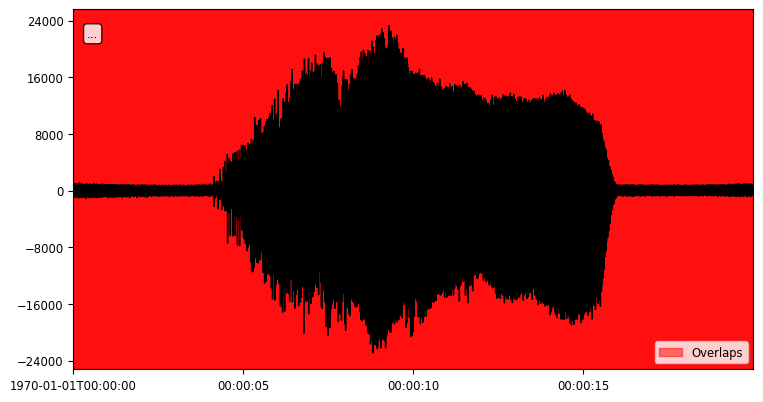

In [101]:
fig = plt.figure(figsize=[8,6])
st[300:501:50].plot(fig=fig)
plt.show()